# Import classic libraries

In [1]:
import numpy as np
import pandas as pd

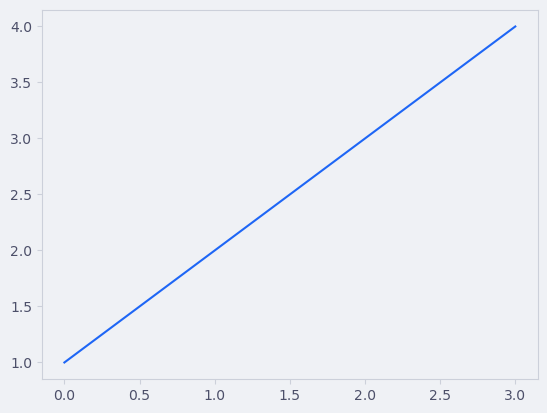

In [2]:
import mplcatppuccin
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplcatppuccin.palette import load_color
from mplcatppuccin.colormaps import get_colormap_from_list
import squarify 
import seaborn as sns

mpl.style.use("latte")
plt.plot([0,1,2,3], [1,2,3,4])
plt.show()

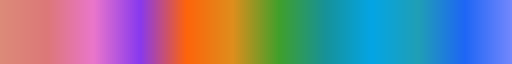

In [3]:
# Define the hex codes for the Catppuccin Latte colorscheme
catppuccin_latte_hex_codes = [
    "#dc8a78",  # Rosewater
    "#dd7878",  # Flamingo
    "#ea76cb",  # Pink
    "#8839ef",  # Mauve
    "#d20f39",  # Red
    "#e64553",  # Maroon
    "#fe640b",  # Peach
    "#df8e1d",  # Yellow
    "#40a02b",  # Green
    "#179299",  # Teal
    "#04a5e5",  # Sky
    "#209fb5"   # Sapphire
]

catppuccin_latte_hex_codes

cmap = get_colormap_from_list("latte", ["rosewater", "flamingo", "pink", "mauve", "peach", "yellow", "green", "teal", "sky", "sapphire", "blue", "lavender"])
colors = [cmap(i) for i in np.linspace(0, 1, 12)]
cmap

## Disable Warning for seaborn 

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Function

In [5]:
## Check fill rate of each features of a dataframe by displaying a bar chart using seaborn
def check_fill_rate(df):
    fill_rate = df.count() / len(df)
    fill_rate = fill_rate.sort_values(ascending=False)
    fill_rate = fill_rate.reset_index()
    fill_rate.columns = ["feature", "fill_rate"]
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(y="fill_rate", x="feature", data=fill_rate, orient="v")

    # Display fill rate at the top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.show()


In [6]:
## Return a print saying how many unique values each non numeric feature has
def check_unique_values(df):
    for col in df.select_dtypes(include="object").columns:
        print(f"{col}: {df[col].nunique()} unique values")

In [7]:
# Function taking column as input and returning a dataframe with, for each unique value of the column, the number of occurences and the percentage of occurences
def count_and_percent(df, col):
    count = df[col].value_counts()
    percent = df[col].value_counts(normalize=True)
    count_percent = pd.concat([count, percent], axis=1)
    count_percent.columns = ["count", "percent"]
    return count_percent.reset_index()

# Exploratory data analysis

## Accounts

In [8]:
accounts = pd.read_csv("data/accounts.csv")
accounts

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN
...,...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States,NaN
81,Zencorporation,technolgy,2011,40.79,142,China,NaN
82,Zoomit,entertainment,1992,324.19,978,United States,NaN
83,Zotware,software,1979,4478.47,13809,United States,NaN


First, we can note the dimension of the dataset : 85 rows and 7 columns.
### Fill Rate Analysis
To understand the completeness of our dataset, we conducted a fill rate analysis for each feature. The fill rate represents the proportion of non-missing values for each column.

The bar chart below illustrates the fill rates for each feature in the dataset:


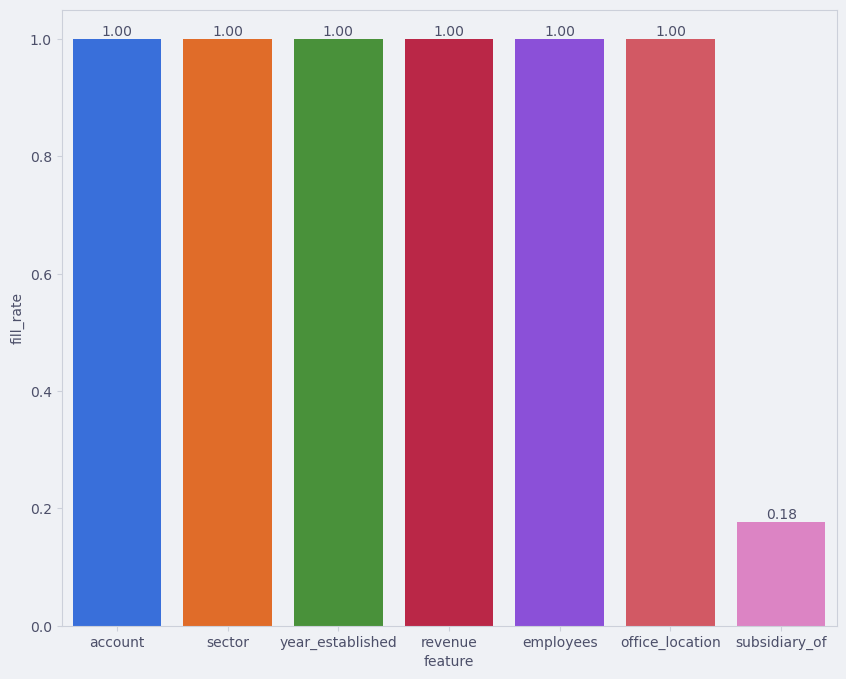

In [9]:
check_fill_rate(accounts)

From the chart, we observe the following:

- **account, sector, year_established, revenue, employees, office_location**: These features have a fill rate of 1.00, indicating that they are fully populated with no missing values.
- **subsidiary_of**: This feature has a significantly lower fill rate of 0.18, suggesting a high number of missing values.

#### Implications and Next Steps
- **Fully Populated Features**: Since the features account, sector, year_established, revenue, employees, and office_location have no missing values, no further action is needed for them regarding missing data.
- **Subsidiary_of**: The high proportion of missing values in the subsidiary_of feature requires attention. Possible strategies include:
  - **Imputation**: Impute missing values using an appropriate method (e.g., mode imputation if this is a categorical feature).
  - **Exclusion**: Consider excluding this feature if its missingness significantly affects the analysis or if imputation is not feasible.
  - **Further Investigation**: Explore the reasons for the missing values to understand any underlying patterns or issues.

In the next steps, we will decide on the most appropriate strategy to handle the missing values in the subsidiary_of feature.


#### Uniqueness Analysis

In [10]:
# Check unique values of non numeric features
check_unique_values(accounts)

account: 85 unique values
sector: 10 unique values
office_location: 15 unique values
subsidiary_of: 7 unique values


### Qualitative Analysis

In [11]:
account_sectors = count_and_percent(accounts, "sector")
account_officelocation = count_and_percent(accounts, "office_location")
account_subsidiaryof = count_and_percent(accounts, "subsidiary_of")

#### Sector Distribution
The first chart illustrates the distribution of companies across various sectors.

Text(0.5, 1.0, 'Sector')

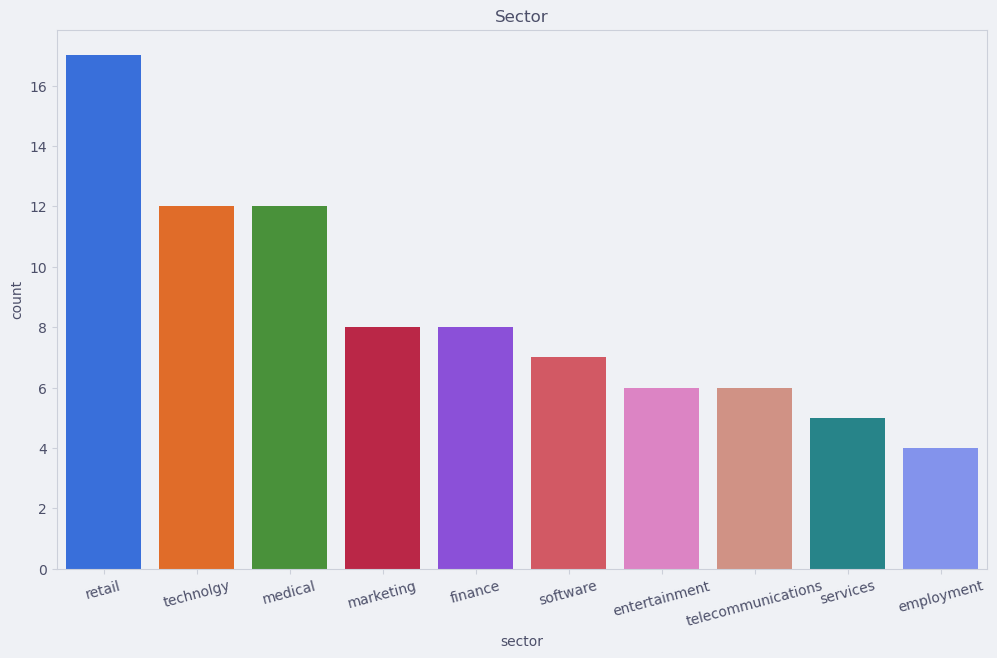

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x="sector", y="count", data=account_sectors, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
ax.set_title("Sector")

Key observations:
- **Retail, Technology, and Medical** sectors have the highest representation with around 11-12 companies each.
- **Employment** sector has the lowest representation with just 4 companies.
- Other sectors such as Marketing, Finance, Software, Entertainment, Telecommunications, and Services have moderate representation.

#### Office Location Distribution
The second chart shows the distribution of company office locations.

Text(0.5, 1.0, 'Office Location')

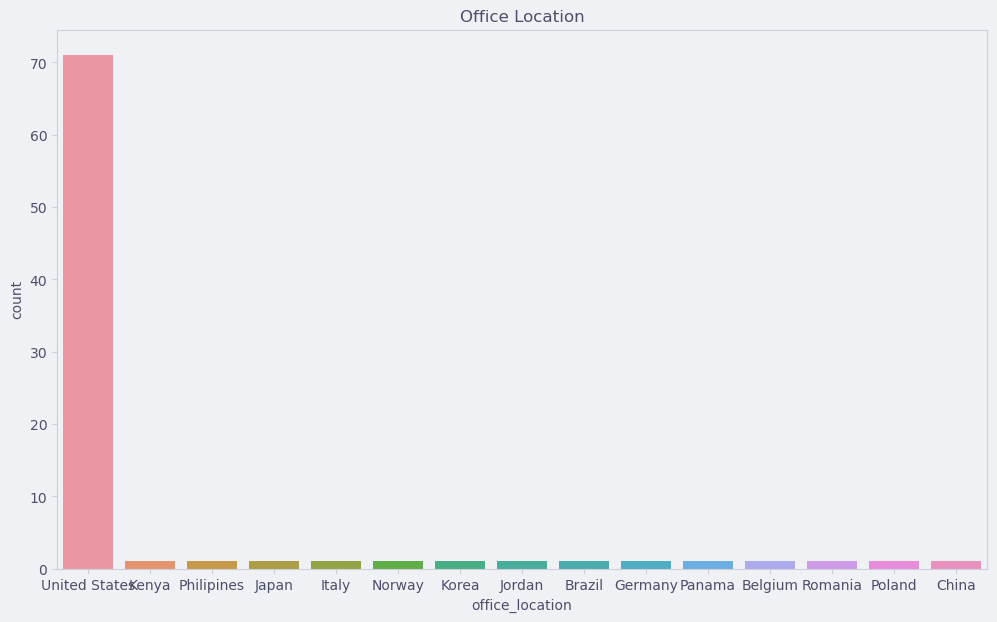

In [13]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x="office_location", y="count", data=account_officelocation, ax=ax)
ax.set_title("Office Location")


Key observations:
- A significant majority of the companies are located in the **United States**, with approximately 70 companies.
- Other countries such as Kenya, Philippines, Japan, Italy, Norway, Korea, Jordan, Brazil, Germany, Panama, Belgium, Romania, Poland, and China have very few representations, typically just one company each.

#### Subsidiary Relationships
The third chart displays the distribution of companies that are subsidiaries of other companies.

Text(0.5, 1.0, 'Subsidiary Of')

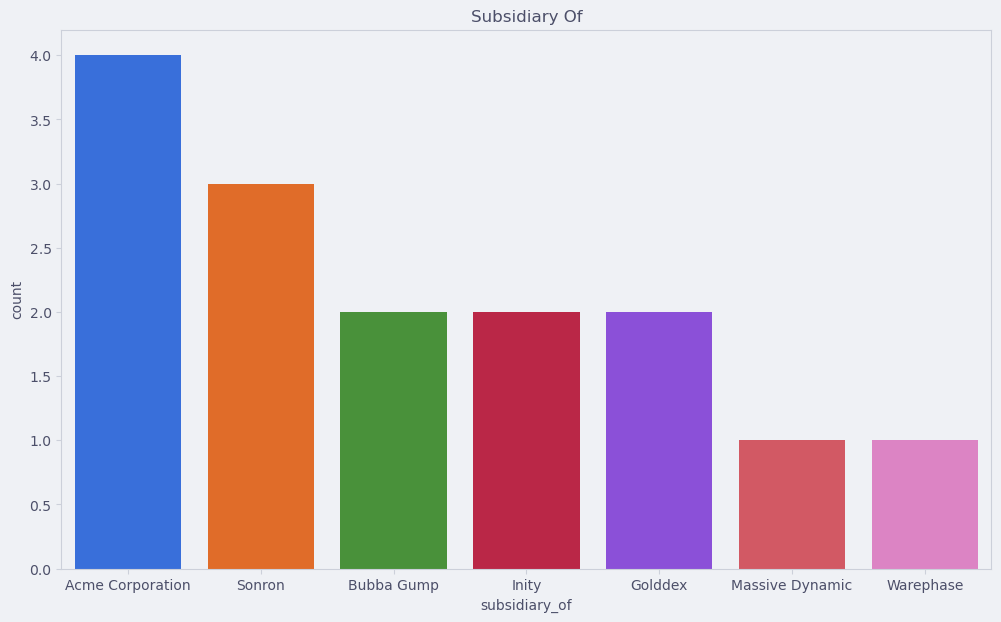

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x="subsidiary_of", y="count", data=account_subsidiaryof, ax=ax)
ax.set_title("Subsidiary Of")

Key observations:
- **Acme Corporation** has the most subsidiaries, with 4 companies under its umbrella.
- Other parent companies like **Sonron, Bubba Gump, Inity, Golddex** have 2-3 subsidiaries each.
- **Massive Dynamic and Warephase** have the fewest subsidiaries, with only 1 company each.

#### Overall Analysis
- The dataset shows a diverse range of sectors, with retail, technology, and medical being the most common.
- The majority of companies are based in the United States, indicating a strong geographic concentration.
- Subsidiary relationships are present but not overly dominant, with a few companies having multiple subsidiaries while most have none.

These visualizations provide a clear overview of the dataset, highlighting key areas of concentration in terms of sectors, geographic locations, and subsidiary relationships. This understanding is crucial for further analysis and strategic decision-making.

Here is the markdown cell explaining the results of the descriptive statistics for the 'year_established' feature:

### Descriptive Statistics of 'Year Established'

To understand the distribution of the 'year_established' feature, we calculate and analyze its descriptive statistics.

In [15]:
accounts['year_established'].describe()

count      85.000000
mean     1996.105882
std         8.865427
min      1979.000000
25%      1989.000000
50%      1996.000000
75%      2002.000000
max      2017.000000
Name: year_established, dtype: float64

Key observations:
- **Count**: There are 85 entries in the 'year_established' feature.
- **Mean**: The average year of establishment is approximately 1996.
- **Standard Deviation (std)**: The standard deviation is about 8.87, indicating some variation around the mean.
- **Minimum (min)**: The earliest year of establishment is 1979.
- **25th Percentile (25%)**: 25% of the companies were established by 1989.
- **Median (50%)**: The median year of establishment is 1996, indicating that half of the companies were established before this year and half after.
- **75th Percentile (75%)**: 75% of the companies were established by 2002.
- **Maximum (max)**: The most recent year of establishment is 2017.

#### Interpretation
The data indicates a wide range of establishment years, from 1979 to 2017, with a notable concentration of companies established in the late 20th century. The median year of 1996 suggests that the dataset includes a balanced mix of older and newer companies. This information is useful for understanding the historical development of the companies in the dataset and may provide insights into trends over time.

## Products

In [16]:
products = pd.read_csv("data/products.csv")
products

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768


### Treemap Visualization of Product Series

The treemap below visualizes the distribution of different product series based on their counts.

<Axes: >

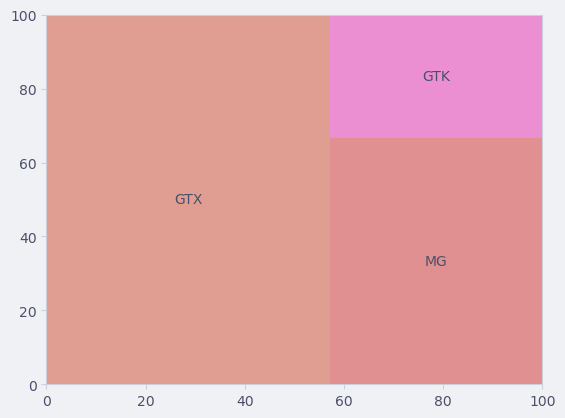

In [17]:
products_series = count_and_percent(products, "series")
squarify.plot(sizes=products_series["count"], label=products_series["series"], color=colors, alpha=0.8) 

#### Key Observations:
- The treemap is a useful visualization for representing hierarchical data and proportions.
- Each rectangle represents a product series, and the size of the rectangle corresponds to the count of that product series.

From the plot, we observe:
- **GTX**: This series occupies the largest area, indicating it has the highest count among the product series.
- **MG**: This series has a substantial count, though less than GTX.
- **GTK**: This series has the smallest area, indicating it has the lowest count among the product series.

#### Interpretation:
- The treemap effectively shows the relative proportions of each product series. 
- The larger area occupied by GTX suggests it is the most prevalent series in the dataset.
- This visualization helps quickly identify which series are most and least common, providing insights into the distribution of products.

### Sales Price by Series

The box plot below visualizes the distribution of sales prices across different product series.

Text(0.5, 1.0, 'Sales Price by Series')

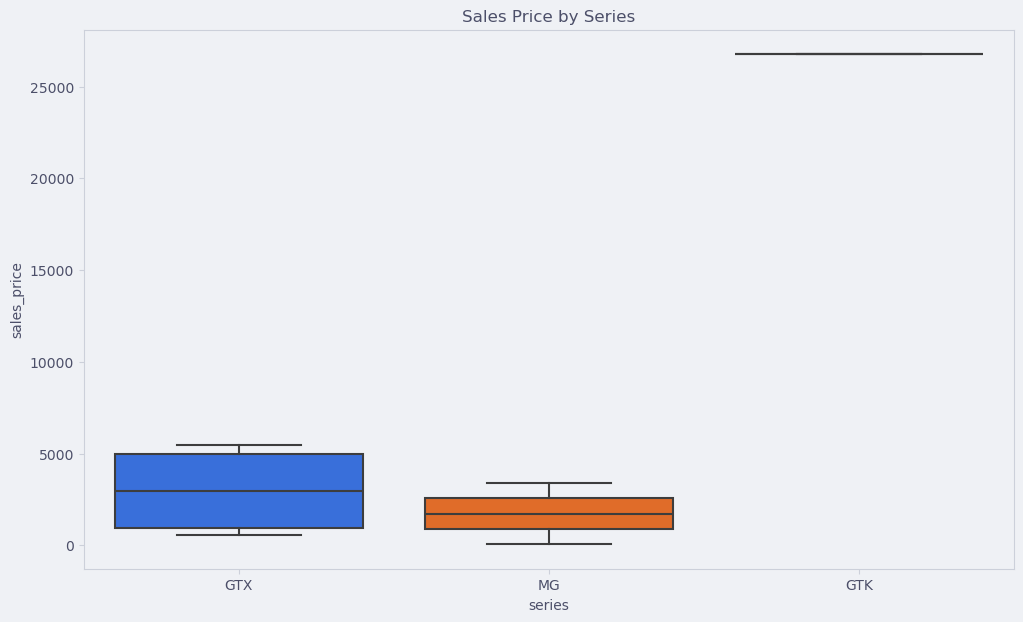

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(x="series", y="sales_price", data=products, ax=ax)
ax.set_title("Sales Price by Series")

#### Key Observations:
- **GTX**: This series shows a wide range of sales prices, with the median price around 2500. The interquartile range (IQR) is relatively large, indicating variability in the prices. There are no apparent outliers in this series.
- **MG**: This series has a lower range of sales prices compared to GTX, with a median price around 1500. The IQR is smaller, indicating less variability in the prices compared to GTX. There are no apparent outliers in this series.
- **GTK**: This series has a significantly higher sales price, with a median price around 25000. The absence of a visible box indicates very little variability in the sales prices for this series. There are no apparent outliers in this series.

#### Interpretation:
- The GTX series exhibits the most variability in sales prices, suggesting a diverse range of products or price points within this series.
- The MG series has less variability in prices, indicating a more consistent pricing strategy or product range.
- The GTK series has a consistently high sales price, which could indicate a premium product line with high value items.

This box plot provides insights into the pricing strategies and product positioning of different series within the dataset, which can be valuable for market analysis and strategic planning.

## Sales Pipeline Analysis
### Dataset Description

This dataset contains information about sales opportunities, including details about the sales agent, product, account, deal stage, engagement and close dates, and close values. The dataset has 8800 rows and 8 columns, described as follows:

- **opportunity_id**: Unique identifier for each sales opportunity.
- **sales_agent**: Name of the sales agent handling the opportunity.
- **product**: The product associated with the sales opportunity.
- **account**: The client account related to the opportunity.
- **deal_stage**: Current stage of the deal (e.g., Won, Prospecting).
- **engage_date**: Date when the engagement with the client started.
- **close_date**: Date when the deal was closed.
- **close_value**: Monetary value of the deal if it is closed.

This dataset is useful for analyzing sales performance, understanding deal progression, and evaluating sales strategies.


In [19]:
sales_pipeline = pd.read_csv("data/sales_pipeline.csv")
sales_pipeline

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


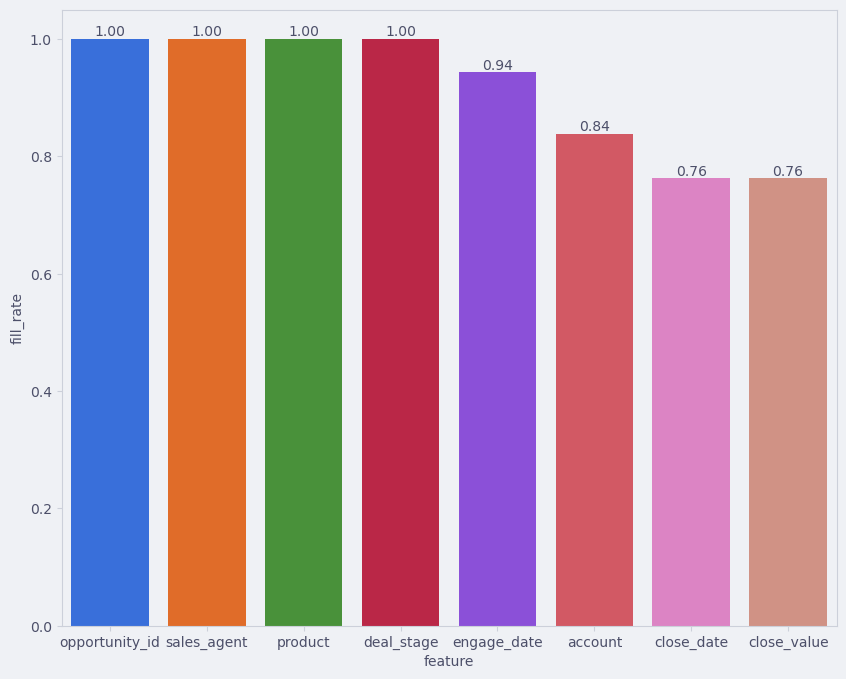

In [20]:
check_fill_rate(sales_pipeline)

### Fill Rate Chart Explanation

The fill rate chart displayed above shows the completeness of various features in the dataset. Each bar represents the fill rate (proportion of non-missing values) for a specific feature. The fill rate is calculated as the number of non-missing entries divided by the total number of entries for that feature.

- **opportunity_id, sales_agent, product, deal_stage**: These features have a fill rate of 1.00, indicating that they are fully populated with no missing values.
- **engage_date**: This feature has a fill rate of 0.94, meaning that 94% of the entries are complete, and 6% are missing.
- **account**: This feature has a fill rate of 0.84, indicating that 84% of the entries are complete, and 16% are missing.
- **close_date, close_value**: Both features have a fill rate of 0.76, showing that 76% of the entries are complete, and 24% are missing.

This chart helps in understanding the data quality and completeness of each feature, which is crucial for performing reliable data analysis and building accurate predictive models.


### Uniqueness

In [21]:
check_unique_values(sales_pipeline)

opportunity_id: 8800 unique values
sales_agent: 30 unique values
product: 7 unique values
account: 85 unique values
deal_stage: 4 unique values
engage_date: 421 unique values
close_date: 306 unique values


### Qualitative analysis of the sales_pipeline dataframe

#### Sales Agent

**Treemap Chart Explanation and Insights**

**Chart Explanation:**
The treemap chart displayed above visualizes the distribution of sales opportunities among various sales agents. Each rectangle represents a sales agent, with the size of the rectangle corresponding to the number of sales opportunities handled by that agent. The color coding helps to distinguish between different agents.

Text(0.5, 1.0, 'Sales Agent')

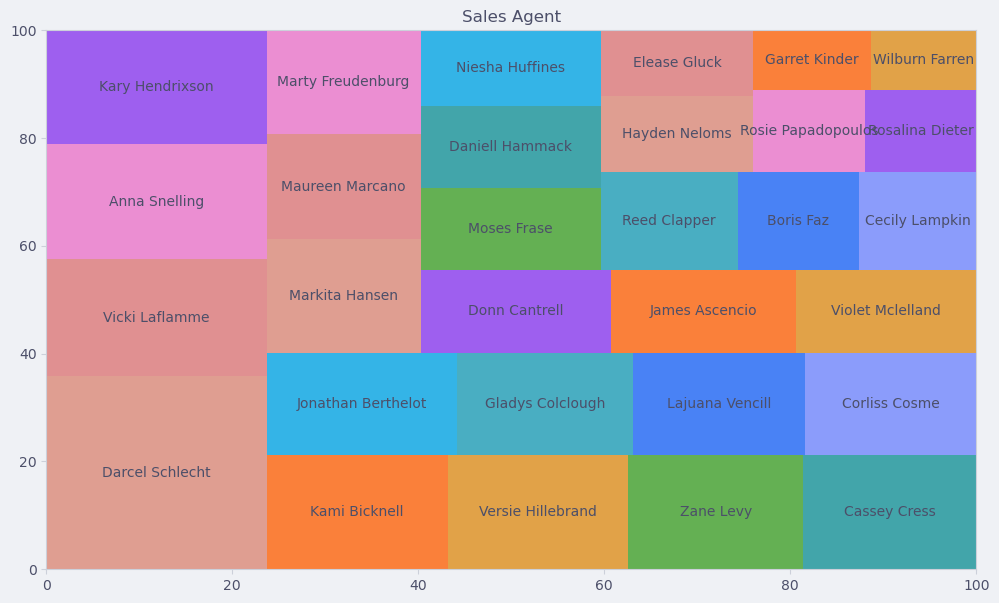

In [22]:
sales_pipeline_sales_agent = count_and_percent(sales_pipeline, "sales_agent")
fig, ax = plt.subplots(figsize=(12, 7))
squarify.plot(sizes=sales_pipeline_sales_agent["count"], label=sales_pipeline_sales_agent["sales_agent"], color=colors, alpha=0.8, ax=ax)
ax.set_title("Sales Agent")

**Insights:**

1. **Top Sales Agents**:
   - **Darcel Schlecht** and **Vicki Laflamme** have the largest rectangles, indicating they manage the highest number of sales opportunities. This suggests that these agents are either highly effective or have been assigned a substantial number of opportunities, potentially reflecting their experience or performance.

2. **Moderately Engaged Agents**:
   - **Jonathan Berthelot**s and **Gladys Colclough** have medium-sized rectangles, suggesting they have a balanced number of sales opportunities. These agents are handling a significant workload, but not as much as the top agents, indicating a possibly optimal capacity.

3. **Least Engaged Agents**:
   - **Garret Kinder**, **Wilburn Farrern** have the smallest rectangles, indicating they manage the fewest sales opportunities. This could be due to various factors such as being new to the role, less effective, or working in regions with fewer opportunities.

4. **Workload Distribution**:
   - The chart shows a varied distribution of workload among the sales agents. Some agents have a significantly higher number of opportunities than others, indicating a potential imbalance. This could be an area for management to investigate to ensure an equitable distribution of work.

5. **Potential Overload**:
   - Agents with the largest rectangles, like **Darcel Schlecht** and **Vicki Laflamme**, might be at risk of being overloaded. It is important to monitor their performance and ensure they have the necessary support and resources to handle their workload efficiently.

6. **Opportunities for Improvement**:
   - Agents with fewer opportunities might benefit from additional training or support to help increase their effectiveness. Understanding why these agents have fewer opportunities can provide insights into potential areas for improvement.

7. **Balanced Workload**:
   - Agents with medium-sized rectangles, such as **Jonathan Berthelot**s and **Gladys Colclough**, appear to have a balanced workload. This indicates a well-managed distribution of opportunities, which could be used as a benchmark for other agents.

This treemap provides a clear visual representation of how sales opportunities are distributed across the sales team, highlighting areas for potential reallocation of resources, support, and training to optimize overall sales performance.

#### Product

Text(0.5, 1.0, 'Product')

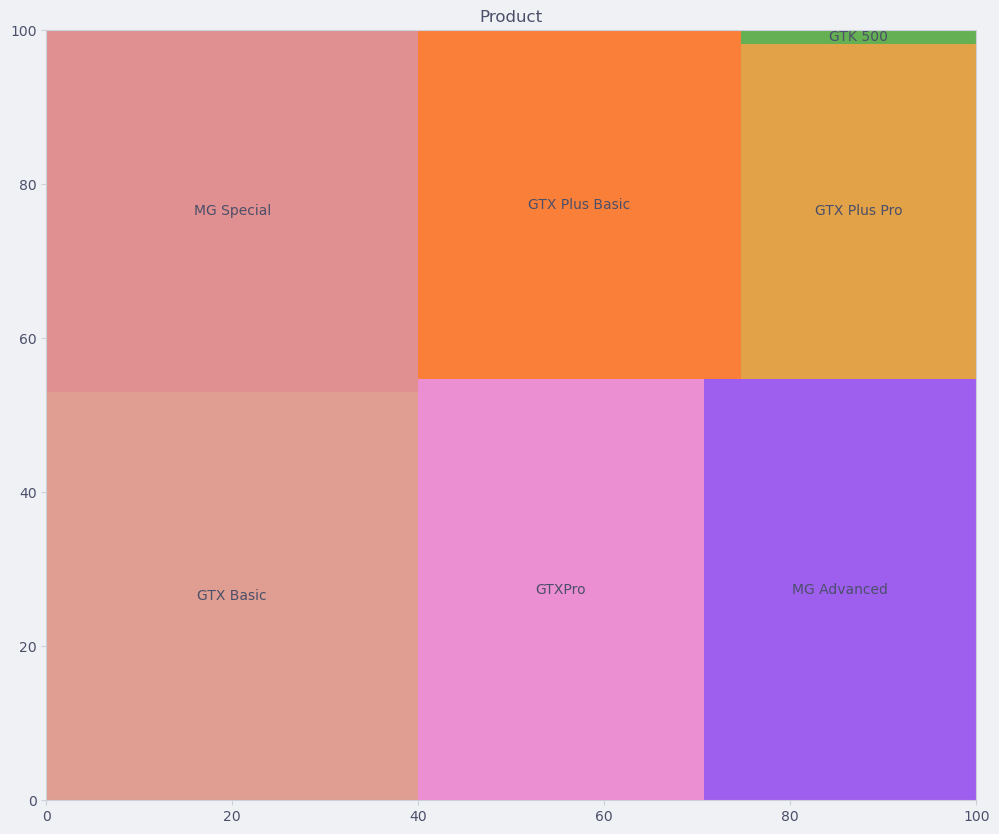

In [23]:
sales_pipeline_product = count_and_percent(sales_pipeline, "product")
fig, ax = plt.subplots(figsize=(12, 10))
squarify.plot(sizes=sales_pipeline_product["count"], label=sales_pipeline_product["product"], color=colors, alpha=0.8, ax=ax)
ax.set_title("Product")

**Insights:**

1. **Top Products**:
   - **GTX Basic** and **MG Special** have the largest rectangles, indicating they account for the highest number of sales opportunities or the largest sales volume. This suggests these products are the most popular or highest-selling items in the product portfolio.

2. **Moderately Popular Products**:
   - **MG Advanced**, **GTX Plus Basic**, and **GTXPro** have medium-sized rectangles. These products also contribute significantly to sales but are not as dominant as the top products.

3. **Least Popular Products**:
   - **GTK 500** have the smallest rectangles, indicating it account for the fewest sales opportunities or the smallest sales volume. These have a significantly higher price compared to other products, which could explain the lower sales volume.

4. **Product Distribution**:
   - The chart shows a varied distribution of sales opportunities across different products. Some products, like **GTX Basic** and **MG Special**, dominate the sales landscape, while others have a more modest presence.

5. **Potential for Growth**:
   - Products with smaller rectangles, such as **GTX Plus Pro** and **GTK 500**, might have potential for growth. Analyzing why these products have fewer sales opportunities could provide insights into areas for marketing efforts, product improvements, or customer engagement strategies.

6. **Balanced Portfolio**:
   - The presence of several moderately sized rectangles indicates a balanced product portfolio where multiple products contribute significantly to the overall sales.

7. **Focus Areas**:
   - The company might focus on promoting products with medium and small rectangles to diversify sales and reduce dependency on the top-selling products. This strategy can help in mitigating risks associated with over-reliance on a few products.

Overall, this treemap chart provides a clear visual representation of how sales opportunities or sales volumes are distributed across different products, highlighting the top-performing products and potential areas for growth and improvement.


#### Opportunities by Account

The bar chart below visualizes the number of sales opportunities associated with each account. 

Text(0.5, 1.0, 'Account')

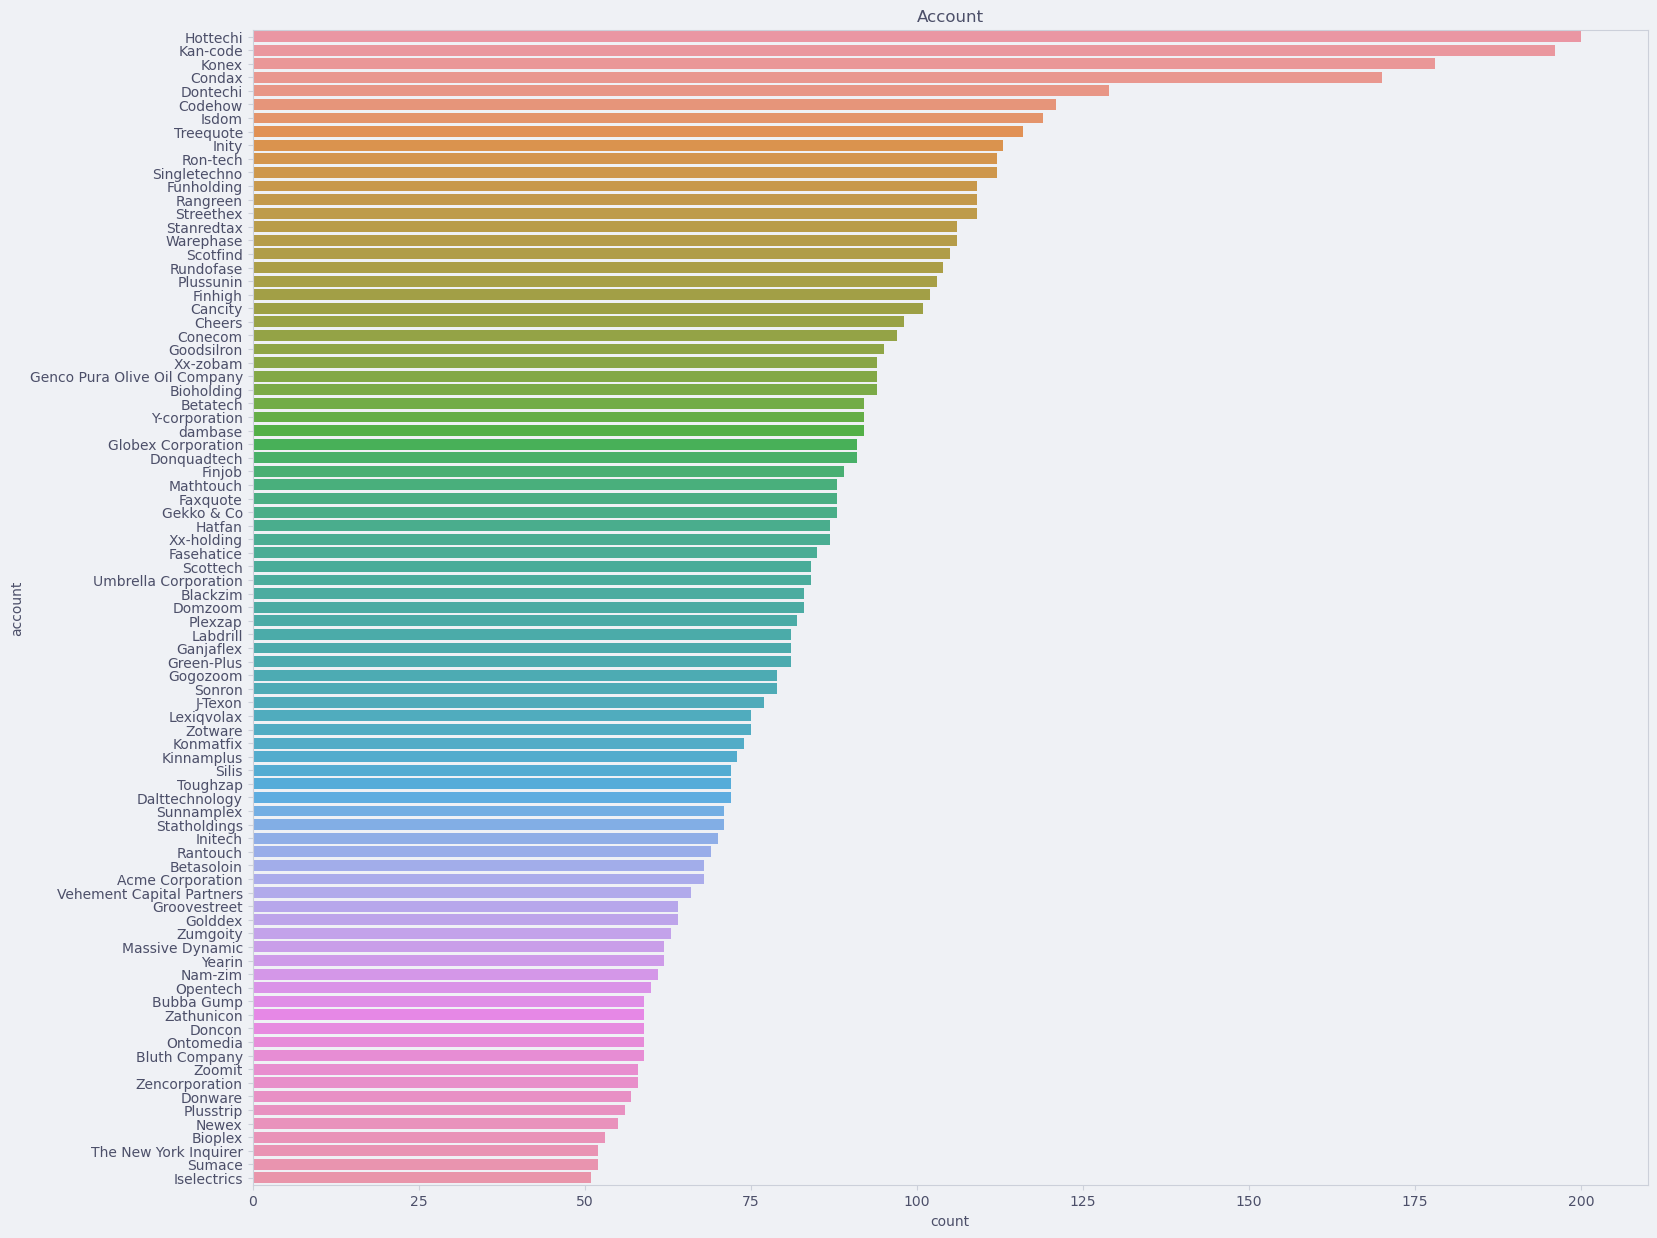

In [25]:
sales_pipeline_account = count_and_percent(sales_pipeline, "account")
fig, ax = plt.subplots(figsize=(18, 15))
sns.barplot(x="count", y="account", data=sales_pipeline_account, ax=ax)
ax.set_title("Account")

**Key Observations:**
- The chart displays the distribution of opportunities across different accounts.
- **Hottechi** has the highest number of opportunities, with close to 200.
- Other accounts with a high number of opportunities include **Kan-code, Konex, Condax, and Dontechi**, each having around 150 opportunities.
- There is a significant drop-off after the top accounts, with many accounts having fewer than 50 opportunities.
- The accounts are sorted in descending order, making it easy to see which accounts are the most and least active.

**Interpretation:**
- This visualization highlights the accounts with the most activity, which could indicate key clients or strategic partnerships.
- The accounts with fewer opportunities might represent areas for potential growth or accounts that require more attention from the sales team.
- Understanding the distribution of opportunities by account can help prioritize resources and efforts to maximize sales performance.

#### Engagements Over Time

The bar chart below visualizes the number of sales engagements over time, broken down by month.

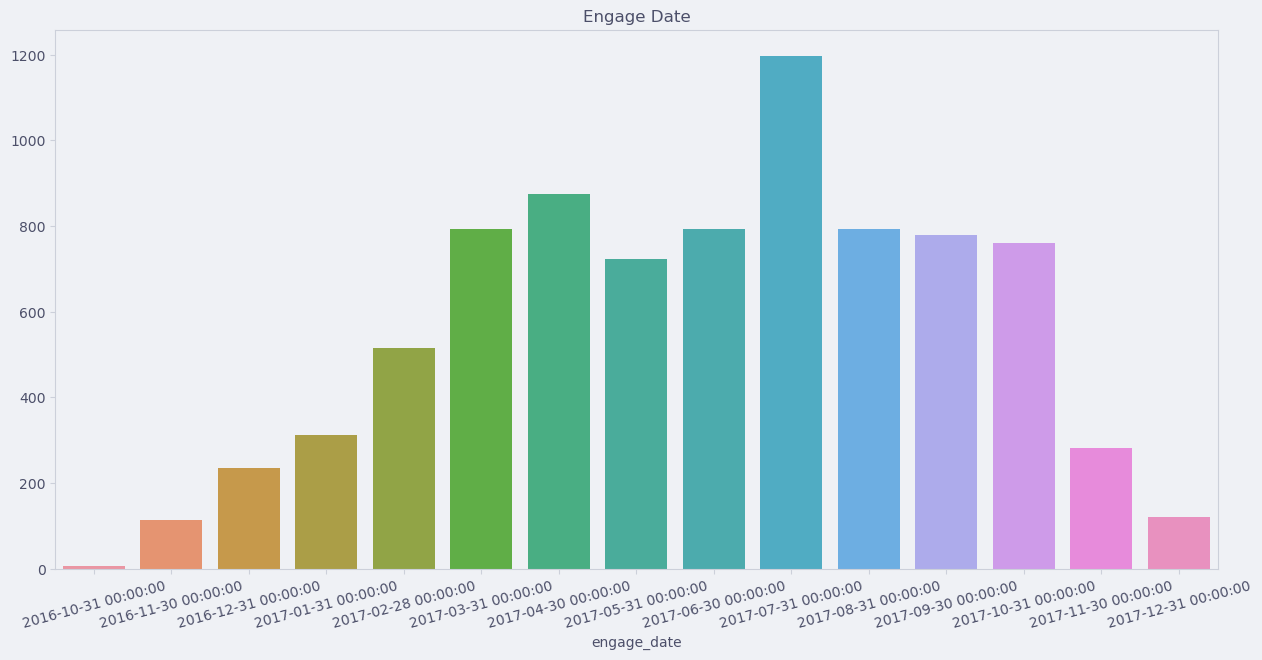

In [50]:
sales_pipeline["engage_date"] = pd.to_datetime(sales_pipeline["engage_date"])
engage_date = sales_pipeline.copy()
engage_date.set_index("engage_date", inplace=True)
engage_date = engage_date.resample("M").size()
engage_date.sort_index(ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=engage_date.index, y=engage_date.values, ax=ax)
ax.set_title("Engage Date")
plt.xticks(rotation=15)
# Show the plot
plt.show()

**Key Observations:**
- The chart displays the distribution of engagement start dates over a period from late 2016 to the end of 2017.
- There is a noticeable increase in engagements starting from December 2016, with a peak in July 2017.
- The highest number of engagements occurred in **July 2017**, with around 1200 engagements.
- After July 2017, the number of engagements starts to decrease, with a significant drop in December 2017.

**Interpretation:**
- The increasing trend in engagements from late 2016 to mid-2017 suggests a growing period of sales activity.
- The peak in July 2017 might indicate a seasonal trend or a successful sales campaign.
- The decline in engagements towards the end of 2017 could be due to seasonal effects, market saturation, or shifts in sales strategy.

This visualization helps in understanding the temporal distribution of sales activities, identifying peak periods, and planning future sales strategies accordingly.

#### Deals Closed Over Time

The bar chart below visualizes the number of deals closed over time, broken down by month.

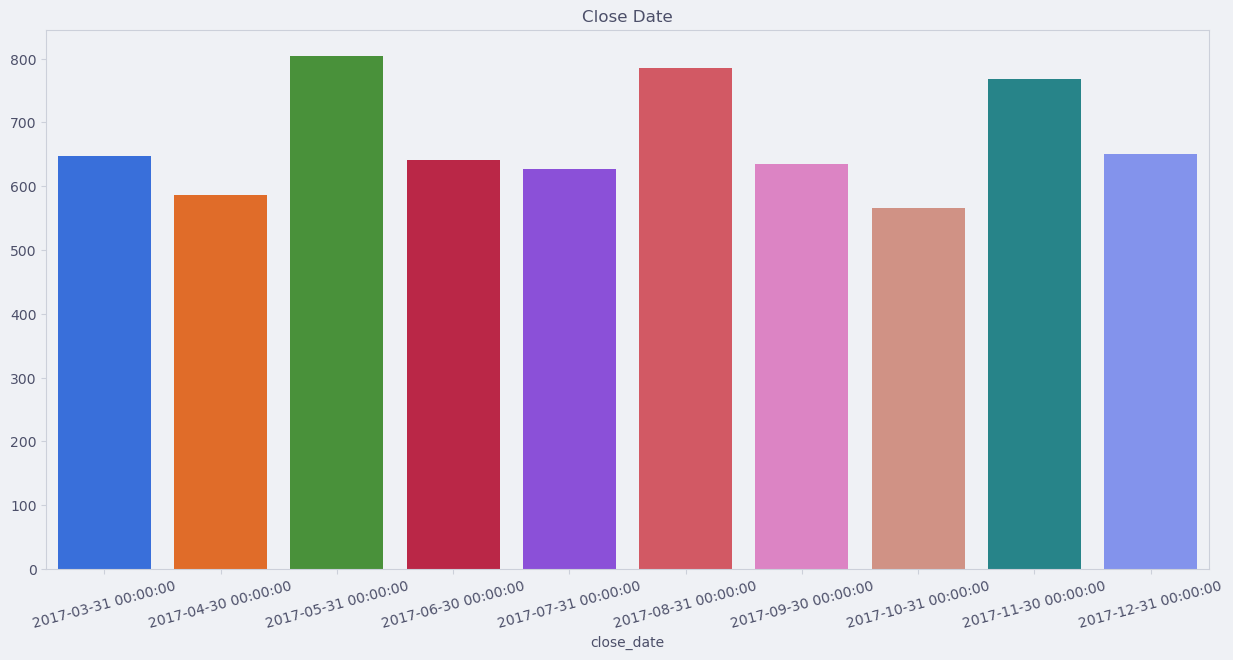

In [51]:
sales_pipeline["close_date"] = pd.to_datetime(sales_pipeline["close_date"])
close_date = sales_pipeline.copy()
close_date.set_index("close_date", inplace=True)
close_date = close_date.resample("M").size()
close_date.sort_index(ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=close_date.index, y=close_date.values, ax=ax)
ax.set_title("Close Date")
plt.xticks(rotation=15)
# Show the plot
plt.show()

### Key Observations:
- The chart displays the distribution of deal closing dates over a period from March 2017 to December 2017.
- There is a relatively steady number of deals closed each month, with some variations.
- The highest number of deals were closed in **May 2017** and **August 2017**, each with around 800 deals closed.
- The lowest number of deals were closed in **April 2017** and **October 2017**, each with fewer than 600 deals closed.

### Interpretation:
- The data indicates consistent sales activity throughout the year, with notable peaks in May and August 2017.
- The peaks could be due to specific sales strategies, seasonal effects, or successful sales campaigns during these months.
- Understanding the distribution of closed deals over time helps in identifying patterns and planning future sales activities accordingly.

This visualization helps in understanding the temporal distribution of closed deals, identifying peak periods, and making informed decisions for future sales strategies.